In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')



In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Data Loading & Inspection 

In [3]:
df = pd.read_csv("D:/YOOBIC_Test/data/stores-sales.csv")

In [4]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (6435, 8)


In [6]:
print(f"Data Types:")
print(df.dtypes)

Data Types:
store             int64
date             object
weekly_sales    float64
holiday_flag      int64
temperature     float64
fuel_Price      float64
cpi             float64
unemployment    float64
dtype: object


In [7]:
print(f"Missing Values:")
print(df.isnull().sum())

Missing Values:
store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_Price      0
cpi             0
unemployment    0
dtype: int64


In [8]:
print(f"Duplicated Values:")
print(df.duplicated().sum())

Duplicated Values:
0


In [9]:
print(f"Basic Statistics:")
df.describe()

Basic Statistics:


,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Data Processing

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")

  Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


# Exploratory Data Analysis

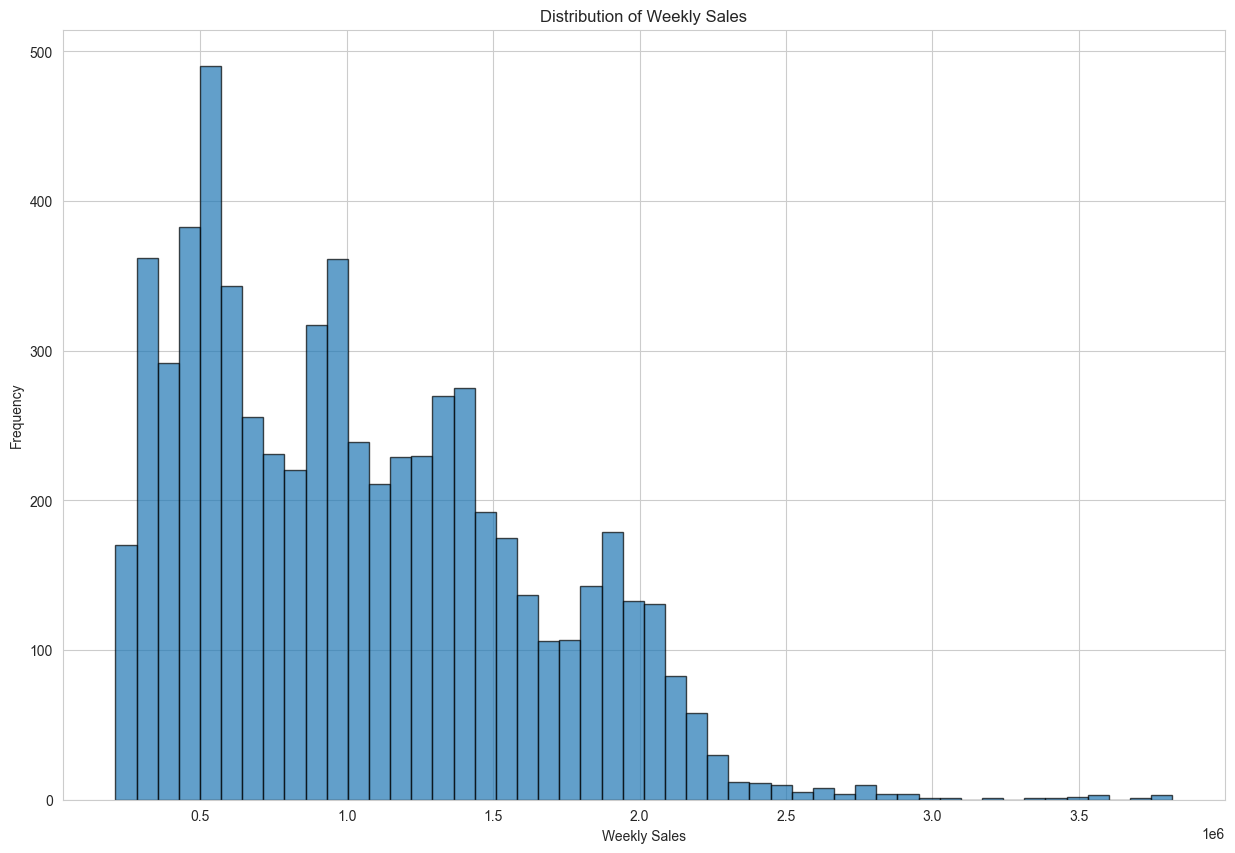

In [24]:
plt.figure(figsize=(15, 10))

plt.hist(df['weekly_sales'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')

plt.show()

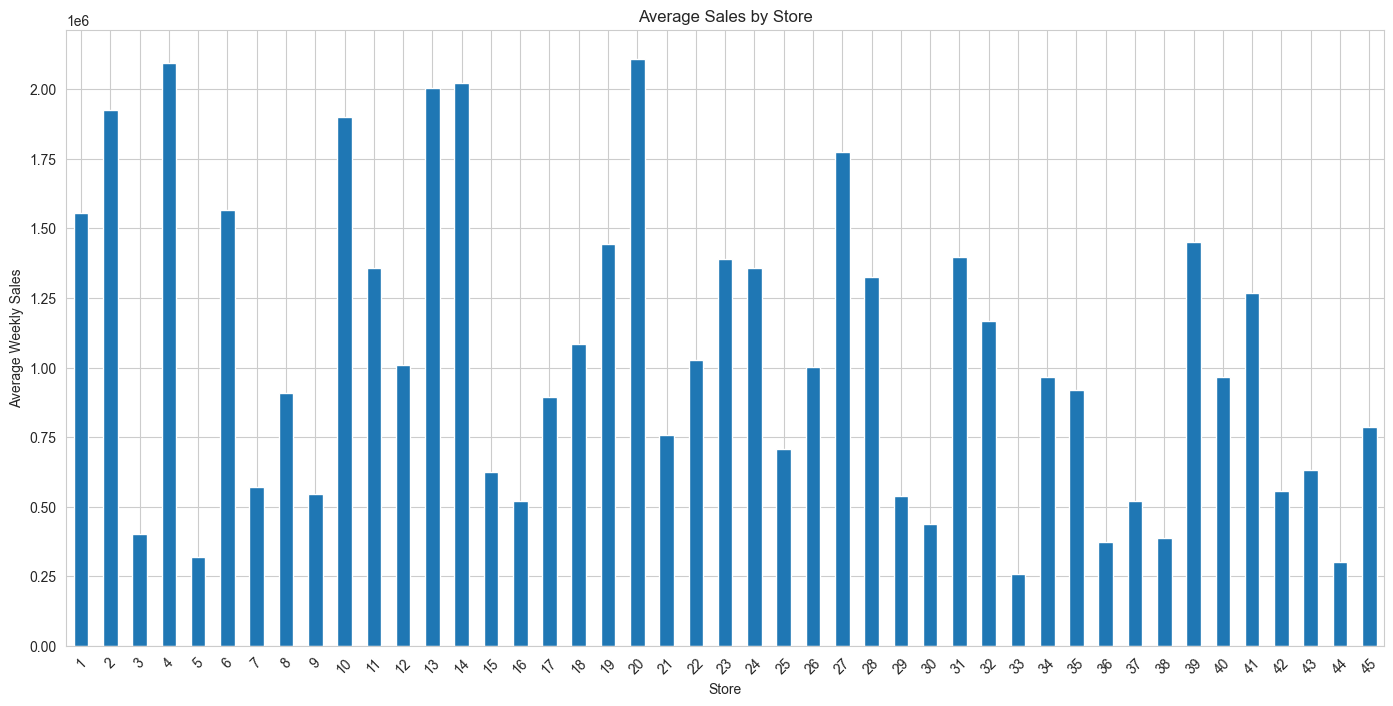

In [27]:
plt.figure(figsize=(17, 8))

df.groupby('store')['weekly_sales'].mean().plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Sales by Store')
plt.xticks(rotation=45)

plt.show()

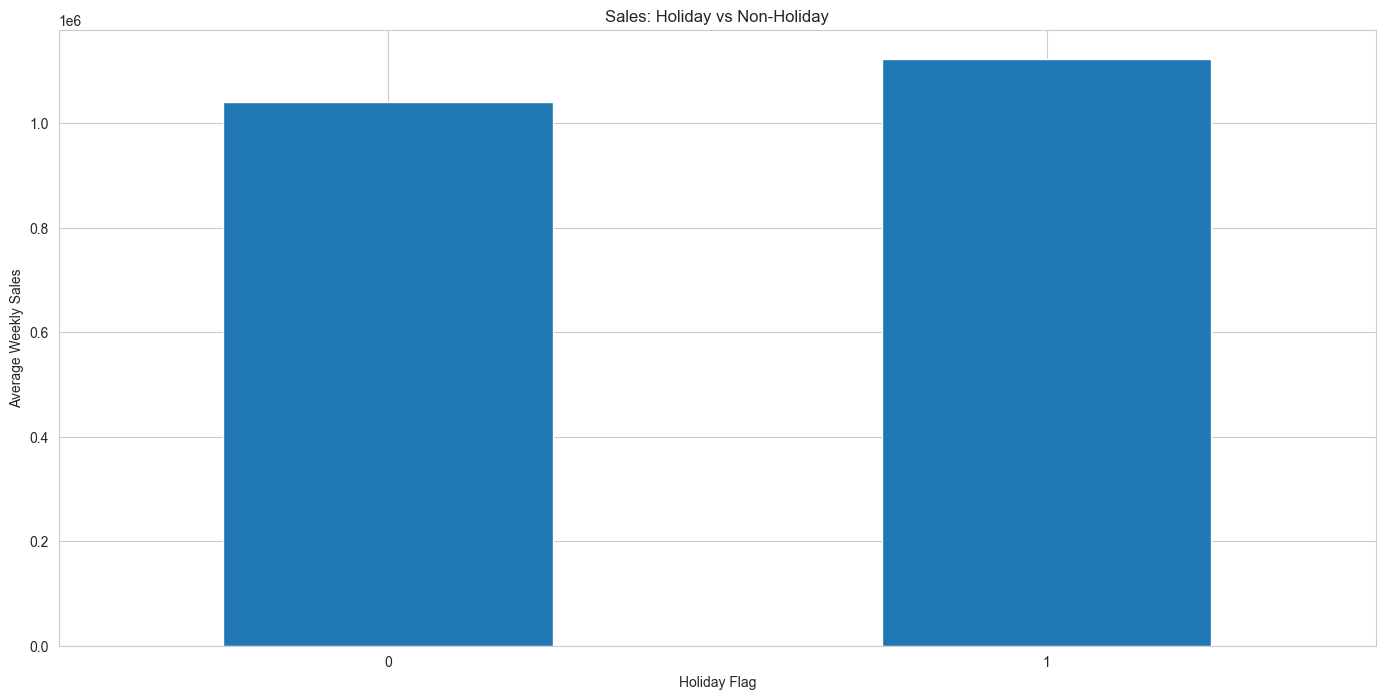

In [28]:
plt.figure(figsize=(17, 8))

df.groupby('holiday_flag')['weekly_sales'].mean().plot(kind='bar')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.title('Sales: Holiday vs Non-Holiday')
plt.xticks(rotation=0)

plt.show()

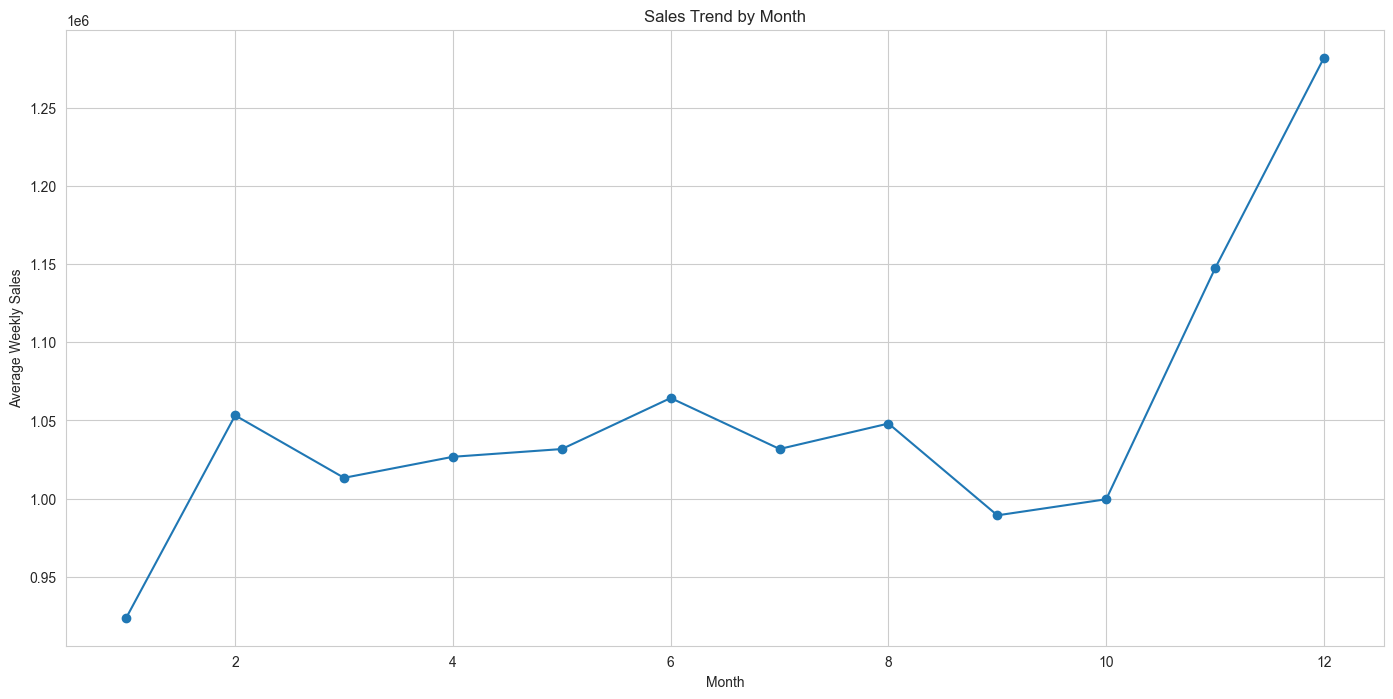

In [33]:
plt.figure(figsize=(17, 8))

df.groupby(df['date'].dt.month)['weekly_sales'].mean().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Sales Trend by Month')
plt.grid(True)

plt.show()

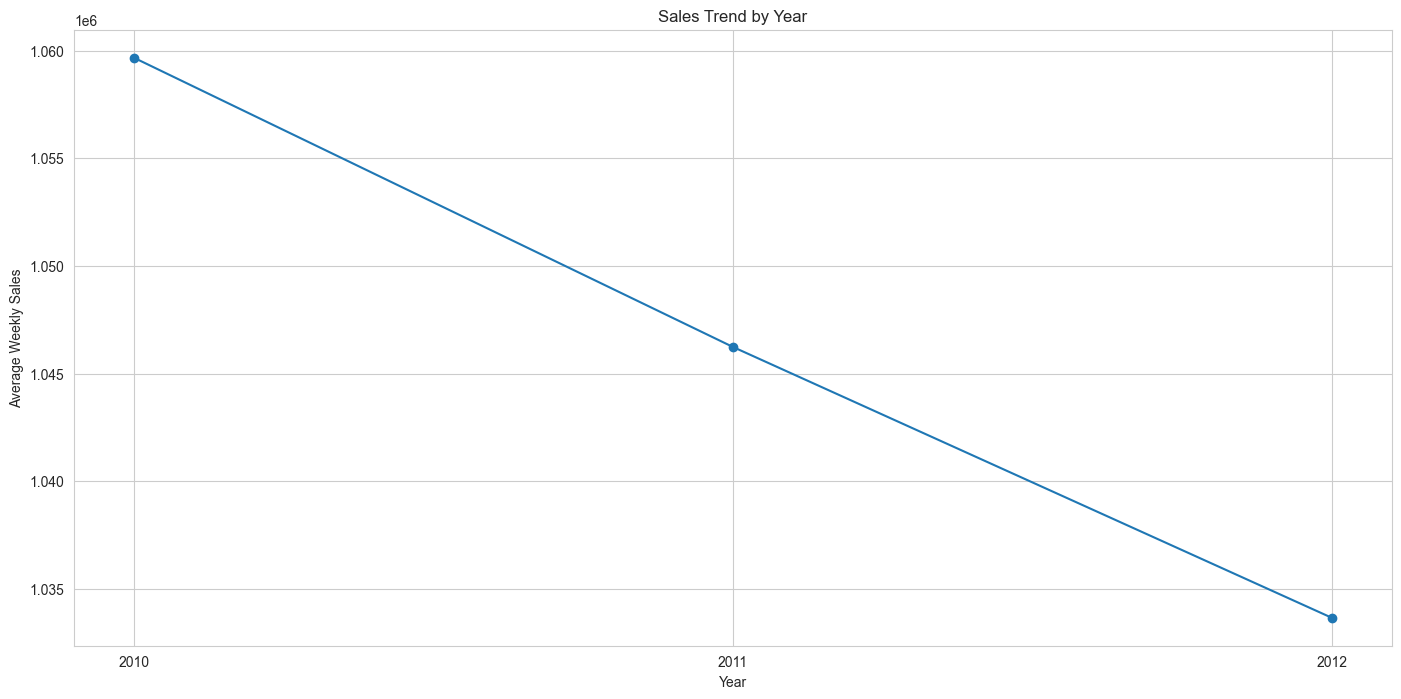

In [43]:
plt.figure(figsize=(17, 8))


yearly_sales = df.groupby(df['date'].dt.year)['weekly_sales'].mean()
yearly_sales.plot(kind='line', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Sales Trend by Year')
plt.grid(True)

plt.xticks(yearly_sales.index)  

plt.show()

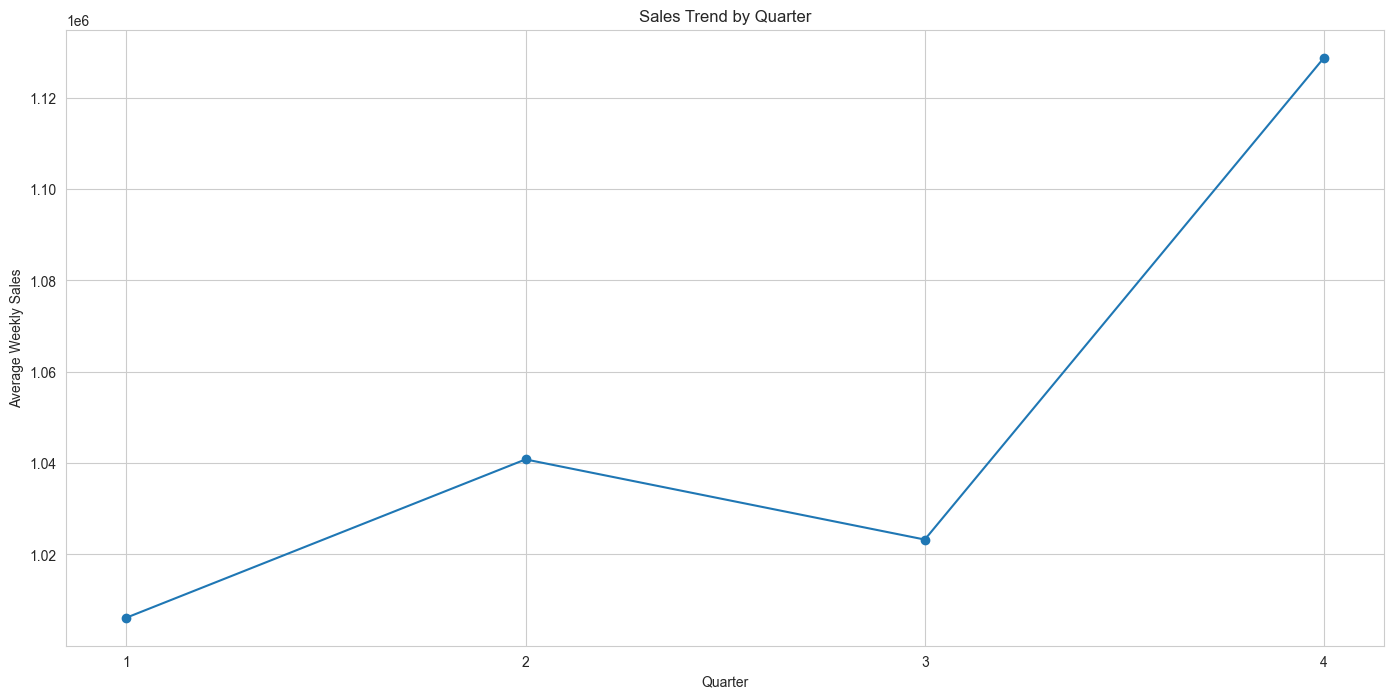

In [46]:
plt.figure(figsize=(17, 8))

quarterly_sales = df.groupby(df['date'].dt.quarter)['weekly_sales'].mean()
quarterly_sales.plot(kind='line', marker='o')

plt.xlabel('Quarter')
plt.ylabel('Average Weekly Sales')
plt.title('Sales Trend by Quarter')
plt.grid(True)

plt.xticks(quarterly_sales.index)  


plt.show()

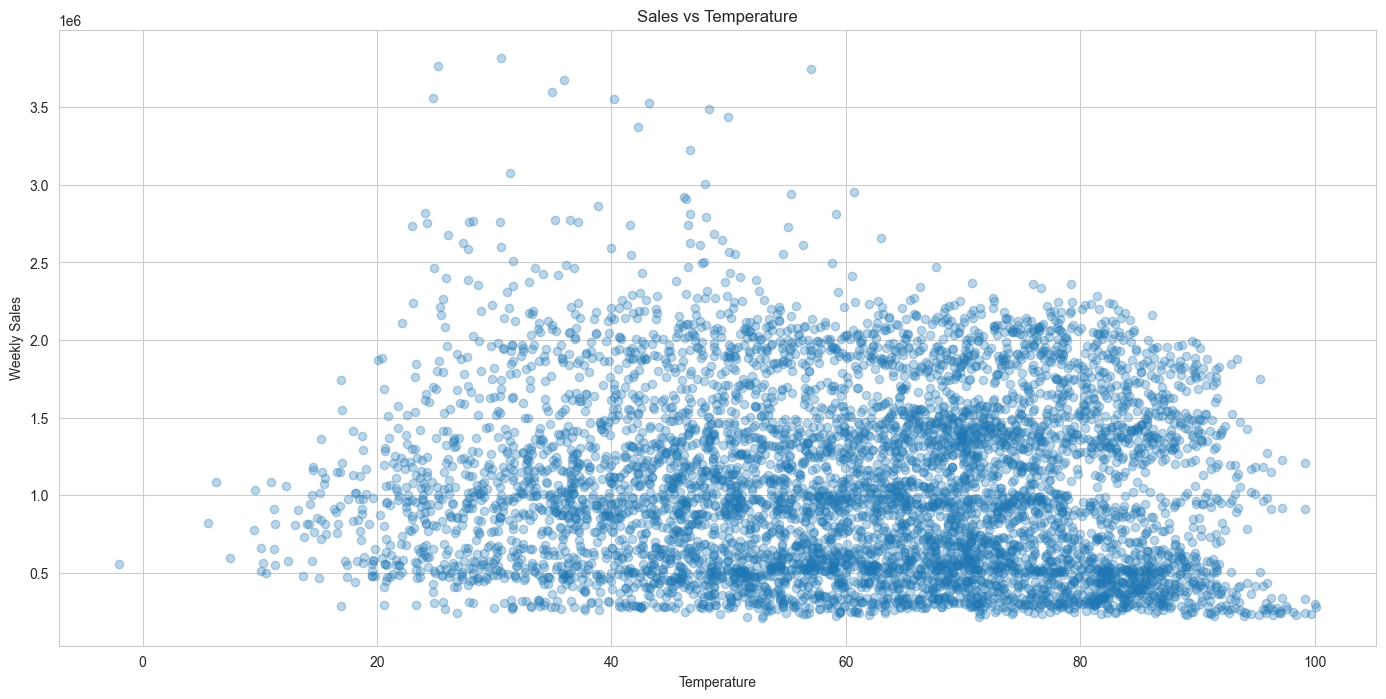

In [34]:
plt.figure(figsize=(17, 8))

plt.scatter(df['temperature'], df['weekly_sales'], alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Sales vs Temperature')

plt.show()

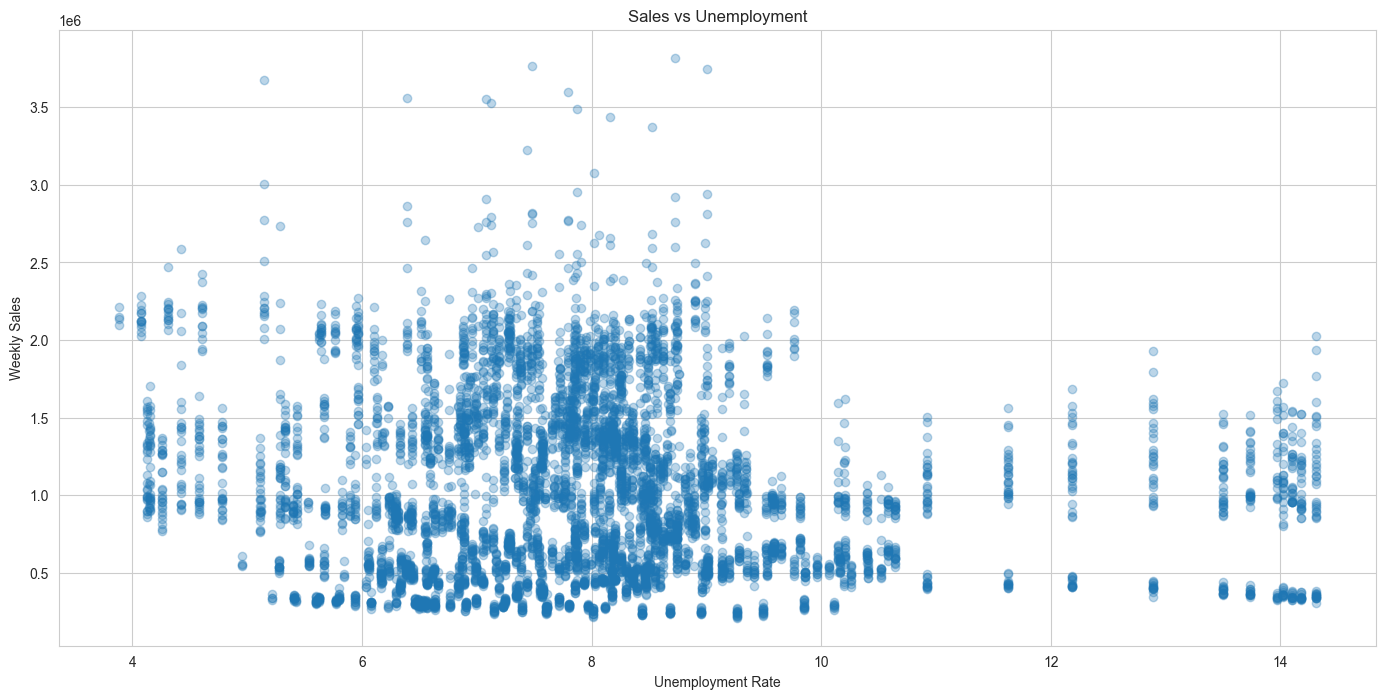

In [13]:
plt.figure(figsize=(17, 8))

plt.scatter(df['unemployment'], df['weekly_sales'], alpha=0.3)
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title('Sales vs Unemployment')


plt.show()

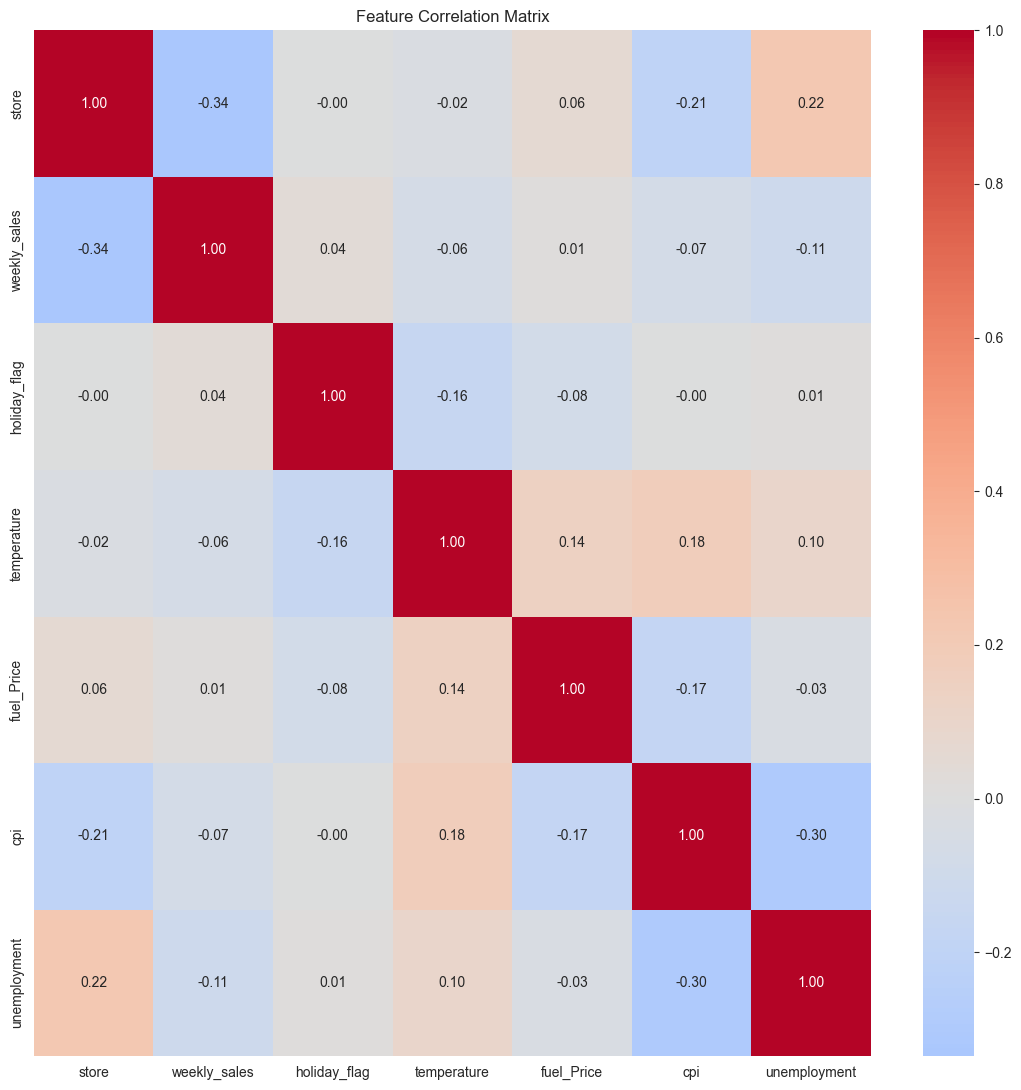

In [23]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(11, 11))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()

plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Modeling Approach and Design Choices

Our goal is to build a robust model to predict weekly sales. Our approach follows a structured pipeline: Exploratory Data Analysis (EDA) to inform feature engineering, establishing a simple baseline model, and then training and tuning more advanced models to achieve the best possible performance.

### Exploratory Data Analysis (EDA) Insights

The initial EDA was crucial for guiding our modeling strategy. Key findings included:
*   **Non-Linear Relationships:** This the most important finding : As we can see in the Correlation Matrix, Most Features did not show any significant linear correlations with `Weekly_Sales`. This suggests that linear models will not give good results, and that tree-based models, which can capture complex and non-linear patterns would likely outperform these linear models.
*   **Strong Seasonality:** Sales show clear monthly, quarterly, and yearly patterns, with a significant peak in Q4, especially around the end-of-year holidays. This confirmed the need for time-based features.
*   **Store-Level Variation:** Average weekly sales vary significantly from one store to another. This means `store` is a vital categorical feature that must be included in the model.
*   **Holiday Impact:** Weeks with holidays (`holiday_flag` = 1) have higher average sales, this validates the importance of this feature.
*   **Target Distribution:** The `weekly_sales` target variable is right-skewed. Applying a **log transformation (`np.log1p`)** helps normalize this distribution.


# Feature Engineering

### Feature Engineering Strategy

Based on the EDA, we engineered several new features to help the model learn the underlying patterns:

*   **Cyclical Time Features:** Instead of using simple integers for months or weeks or days (where 12 is far from 1), we transformed them into a cyclical space using **sinus and cosine functions**. This correctly represents the cyclical nature of time (December is close to January). This helps the model understand seasonal patterns more effectively. We applied this to `month`, `day`, `week_of_year`, and `day_of_year`.
*   **Holiday Proximity Features:** The `holiday_flag` only tells us if the week *contains* a holiday. However, sales often build up in the weeks *leading up to* a major event. We created features like `weeks_to_christmas` and `weeks_to_super_bowl` .... etc, to capture this proximity effect.

In [13]:
# 1. Date Features :

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day 
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)
df['day_of_year'] = df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter


In [15]:
# Get number of days in the month for each date 
df['days_in_month'] = df['date'].dt.days_in_month

# Get if it's a leap year 
df['is_leap'] = df['date'].dt.is_leap_year

# Get total days in year
df['days_in_year'] = df['is_leap'].apply(lambda x: 366 if x else 365)

# Make it cyclical :

# Month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Week of year 
df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 53)
df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 53)

# Day within the month
df['day_sin'] = np.sin(2 * np.pi * df['day'] / df['days_in_month'])
df['day_cos'] = np.cos(2 * np.pi * df['day'] / df['days_in_month'])

# Day in year
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / df['days_in_year'])
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / df['days_in_year'])

In [16]:
super_bowl = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10'])
labour_day = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07'])
thanksgiving = pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23'])
christmas = pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28'])


holidays = {
    'super_bowl': super_bowl,
    'labour_day': labour_day,
    'thanksgiving': thanksgiving,
    'christmas': christmas
}

for holiday_name, holiday_dates in holidays.items():
    year_to_holiday_date = {d.year: d for d in holiday_dates}
    holiday_date_for_row = df['year'].map(year_to_holiday_date)
    df[f'weeks_to_{holiday_name}'] = (df['date'] - holiday_date_for_row).dt.days / 7
    df[f'weeks_to_{holiday_name}'].fillna(99, inplace=True)

In [17]:
df = df.drop(['days_in_year', 'is_leap', 'days_in_month', 'month', 'day', 'week_of_year', 'day_of_year'], axis=1)

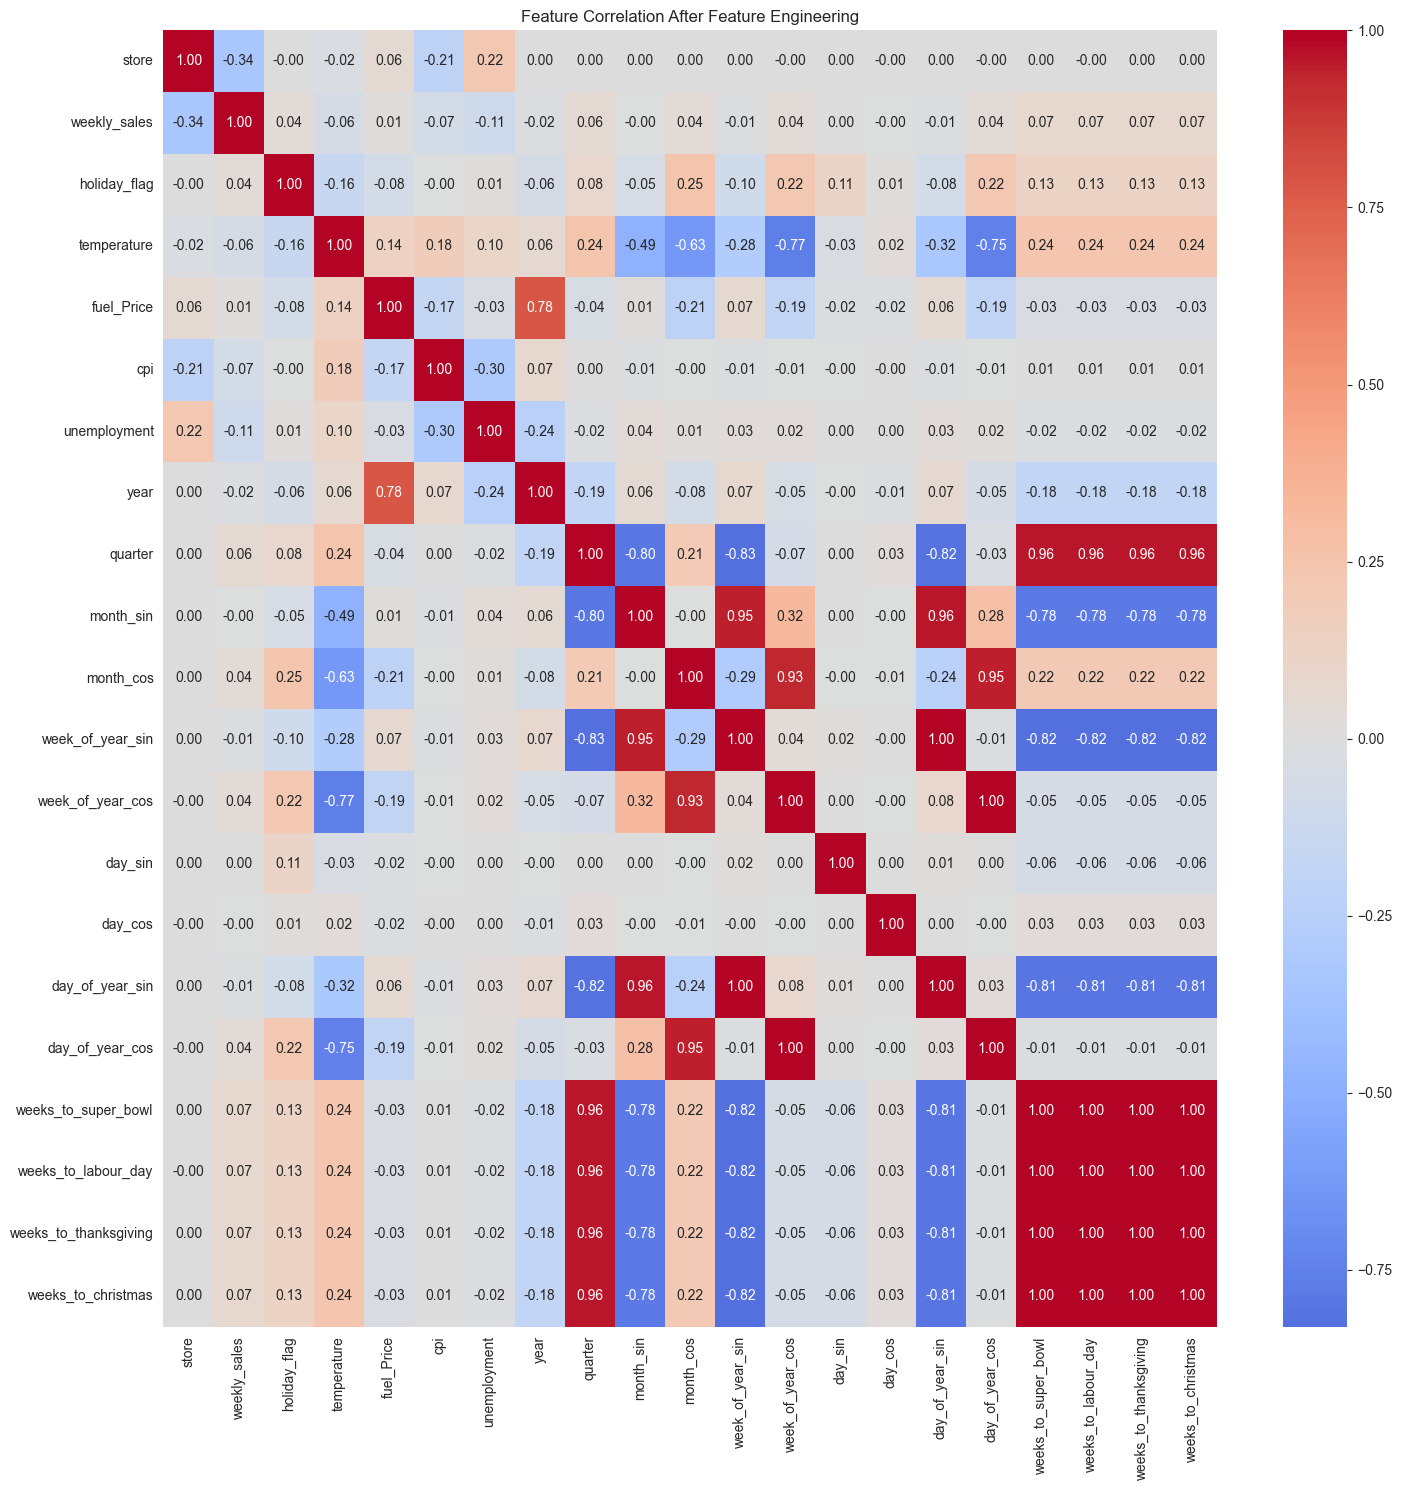

In [18]:
correlation_matrix_2 = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation_matrix_2, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation After Feature Engineering')
plt.tight_layout()

plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

## Data Pocessing For training

### Splitting Strategy for the first two models

 **Time-Based Splitting:** This is a time-series problem, so a random train-test split would be incorrect and lead to data leakage (training on future data to predict the past). We used a **chronological split**, training on data before `2012-01-01`, testing on a test set of data between `2012-01-01` and `2012-11-01`.

In [21]:
processed_df = df.copy() 

In [23]:
split_date = '2012-01-01'
train_df = processed_df[df['date'] < split_date]
val_df = processed_df[df['date'] >= split_date]

print(f"Train set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")

Train set shape: (4500, 22)
Validation set shape: (1935, 22)


In [25]:
train_df = train_df.drop(['date'], axis=1)
val_df = val_df.drop(['date'], axis=1)


In [26]:
val_df

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,year,quarter,month_sin,...,week_of_year_sin,week_of_year_cos,day_sin,day_cos,day_of_year_sin,day_of_year_cos,weeks_to_super_bowl,weeks_to_labour_day,weeks_to_thanksgiving,weeks_to_christmas
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1,0.500000,...,0.118273,0.992981,0.937752,0.347305,0.102821,0.994700,-5.0,-35.0,-46.0,-51.0
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,0.500000,...,0.234886,0.972023,0.485302,-0.874347,0.221325,0.975200,-4.0,-34.0,-45.0,-50.0
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,0.500000,...,0.348202,0.937420,-0.790776,-0.612106,0.336637,0.941634,-3.0,-33.0,-44.0,-49.0
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,0.500000,...,0.456629,0.889657,-0.724793,0.688967,0.447094,0.894487,-2.0,-32.0,-43.0,-48.0
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,2012,1,0.866025,...,0.558647,0.829406,0.605174,0.796093,0.551102,0.834438,-1.0,-31.0,-42.0,-47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,3,-1.000000,...,-0.996050,-0.088796,-0.406737,0.913545,-0.999079,-0.042905,33.0,3.0,-8.0,-13.0
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,4,-0.866025,...,-0.999561,0.029633,0.848644,0.528964,-0.997018,0.077175,34.0,4.0,-7.0,-12.0
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,4,-0.866025,...,-0.989040,0.147647,0.651372,-0.758758,-0.980575,0.196143,35.0,5.0,-6.0,-11.0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,4,-0.866025,...,-0.964636,0.263587,-0.651372,-0.758758,-0.949990,0.312281,36.0,6.0,-5.0,-10.0


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
X_train = train_df.drop('weekly_sales', axis=1)
y_train = train_df['weekly_sales']
X_val = val_df.drop('weekly_sales', axis=1)
y_val = val_df['weekly_sales']


In [31]:
# Apply log transformation to weekly sales
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [32]:
categorical_features = ['store']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

print(f"\nIdentified {len(numerical_features)} numerical features.")
print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")



Identified 19 numerical features.
Identified 1 categorical features: ['store']


In [33]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [35]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

In [42]:
print(f"\nShape of X_train after processing: {X_train_processed.shape}")
print(f"Shape of X_val after processing: {X_val_processed.shape}")



Shape of X_train after processing: (4500, 64)
Shape of X_val after processing: (1935, 64)


### Model Selection and Training

We are going to use first linear models to verify the hypothesis made based on the correlation matrix :
  **Ridge & Linear Regression:** We started with simple linear models. They are fast and provide a crucial performance baseline.


# Model Training : Linear Regression

In [51]:
print("Training Linear Regression model...")
linear_reg_model = LinearRegression()

# fittin the model
linear_reg_model.fit(X_train_processed, y_train_log)
print("Model training complete.")


Training Linear Regression model...
Model training complete.


In [52]:
print("Making predictions on the validation set...")
y_pred_log = linear_reg_model.predict(X_val_processed)

# 3. Inverse transform the predictions 
y_pred = np.expm1(y_pred_log)

# 4. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("\n--- Linear Regression Baseline Results ---")
print(f"Validation RMSE: ${rmse:,.2f}")
print("-----------------------------------------")


Making predictions on the validation set...

--- Linear Regression Baseline Results ---
Validation RMSE: $142,287.57
-----------------------------------------


# Model Training : Ridge Regression

In [43]:
print("Training Ridge Regression model...")
ridge_model = Ridge(alpha=1.0, random_state=42)

# fittin the model
ridge_model.fit(X_train_processed, y_train_log)
print("Model training complete.")


Training Ridge Regression model...
Model training complete.


In [44]:
print("Making predictions on the validation set...")
y_pred_log = ridge_model.predict(X_val_processed)

# 3. Inverse transform the predictions 
y_pred = np.expm1(y_pred_log)

# 4. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("\n--- Ridge Regression Baseline Results ---")
print(f"Validation RMSE: ${rmse:,.2f}")
print("-----------------------------------------")


Making predictions on the validation set...

--- Ridge Regression Baseline Results ---
Validation RMSE: $109,507.06
-----------------------------------------


In [45]:
# first 5 predictions vs actuals
results_df = pd.DataFrame({'Actual Sales': y_val, 'Predicted Sales': y_pred})
print("\nSample of predictions vs actuals:")
print(results_df.head().to_string(formatters={'Actual Sales': '${:,.2f}'.format, 'Predicted Sales': '${:,.2f}'.format}))


Sample of predictions vs actuals:
     Actual Sales Predicted Sales
100 $1,550,369.92   $1,402,886.02
101 $1,459,601.17   $1,432,222.14
102 $1,394,393.84   $1,449,698.88
103 $1,319,325.59   $1,449,321.68
104 $1,636,339.65   $1,472,109.34


### Model Selection and Training

Our modeling process was iterative:

1.  **Time-Based Splitting:** We now use a **chronological split**, training on data before `2012-01-01`, validating on data between `2012-01-01` and `2012-06-01`, and holding out a final test set of data after `2012-06-01` to simulate a real-world prediction scenario.

2.  **Baselines (Ridge & Linear Regression):** We started with simple linear models. Ridge Regression (`RMSE: $109,507`) outperformed standard Linear Regression, indicating that some regularization was helpful. However, their performance was limited, as expected from the EDA.

3.  **Advanced Models (LightGBM & XGBoost):** We then moved to gradient-boosted decision tree models, which are state-of-the-art for tabular data.
    *   **LightGBM** is known for its speed and efficiency. It also has excellent native handling of categorical features, which simplifies our preprocessing pipeline.
    *   **XGBoost** is another powerful and popular choice, often delivering top-tier accuracy.


# Model Training : LightGBM

--- Data Shapes after Train/Val/Test Split ---
Train set shape:      (4500, 22)
Validation set shape: (945, 22)
Test set shape:       (990, 22)

Training LightGBM model...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2329]	training's rmse: 0.0311169	valid_1's rmse: 0.0744669
Model training complete.

Plotting training history...


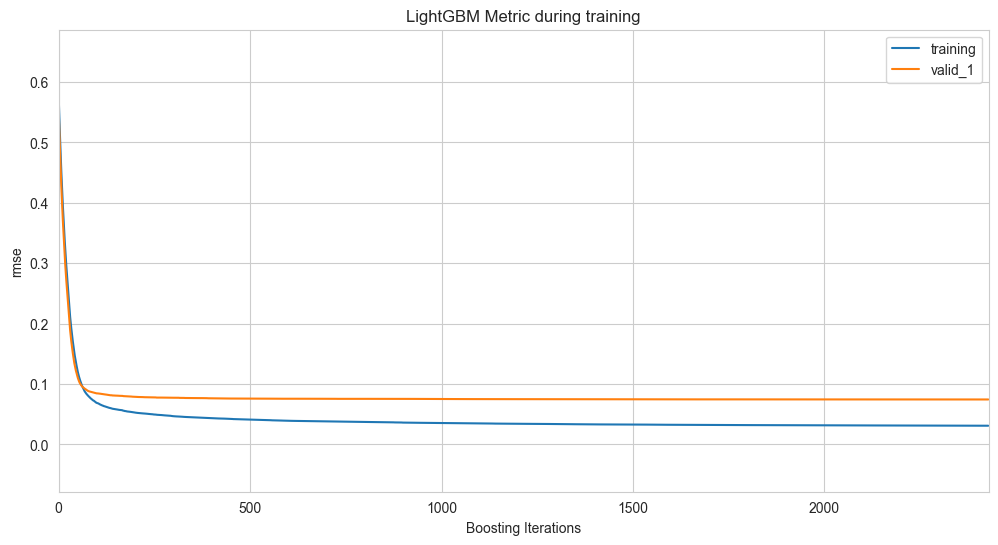


Making predictions on the Test set...

--- LightGBM Final Results ---
Test Set RMSE: $80,974.19
------------------------------

Sample of predictions vs actuals on Test Set:
   Actual Sales Predicted Sales
0 $1,624,477.58   $1,536,903.42
1 $1,697,230.96   $1,604,179.99
2 $1,630,607.00   $1,572,339.55
3 $1,527,845.81   $1,549,858.52
4 $1,540,421.49   $1,494,761.12


In [61]:
# Define split points
val_split_date = '2012-01-01'
test_split_date = '2012-06-01'

# Create the splits
train_df = processed_df[processed_df['date'] < val_split_date]
val_df = processed_df[(processed_df['date'] >= val_split_date) & (processed_df['date'] < test_split_date)]
test_df = processed_df[processed_df['date'] >= test_split_date]

print("--- Data Shapes after Train/Val/Test Split ---")
print(f"Train set shape:      {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape:       {test_df.shape}")

# Features and target
TARGET = 'weekly_sales'
FEATURES = [col for col in train_df.columns if col not in ['date', TARGET]]

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_val = val_df[FEATURES]
y_val = val_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]


categorical_features = ['store']

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print("\nTraining LightGBM model...")

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

lgbm = lgb.LGBMRegressor(
    objective='regression_l1', 
    metric='rmse',
    n_estimators=10000,       
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    seed=42,
    n_jobs=-1,
    verbose=-1
)

lgbm.fit(
    X_train, y_train_log,
    eval_set=[(X_train, y_train_log), (X_val, y_val_log)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100, verbose=True)],
    categorical_feature=categorical_features
)

print("Model training complete.")

# ---  Visualize Training and Validation Loss ---
print("\nPlotting training history...")
lgb.plot_metric(lgbm, title='LightGBM Metric during training', xlabel='Boosting Iterations')
plt.show()

# ---  Evaluate on the Hold-Out Test Set ---
print("\nMaking predictions on the Test set...")
test_pred_log = lgbm.predict(X_test)

test_pred = np.expm1(test_pred_log)

final_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("\n--- LightGBM Final Results ---")
print(f"Test Set RMSE: ${final_rmse:,.2f}")
print("------------------------------")

test_results_df = pd.DataFrame({'Actual Sales': y_test.values, 'Predicted Sales': test_pred})
print("\nSample of predictions vs actuals on Test Set:")
print(test_results_df.head().to_string(formatters={'Actual Sales': '${:,.2f}'.format, 'Predicted Sales': '${:,.2f}'.format}))

# Model Training : XGBOOST


Identified 19 numerical features for XGBoost.
Identified 1 categorical features for XGBoost: ['store']

Shape of X_train after processing: (4500, 64)
Shape of X_val after processing: (945, 64)

Training XGBoost model...
Model training complete.

--- Best Model Details ---
Best Iteration: 1526
Best Validation RMSE: 0.0753
Training RMSE at Best Iteration: 0.0154
--------------------------

Plotting training history...


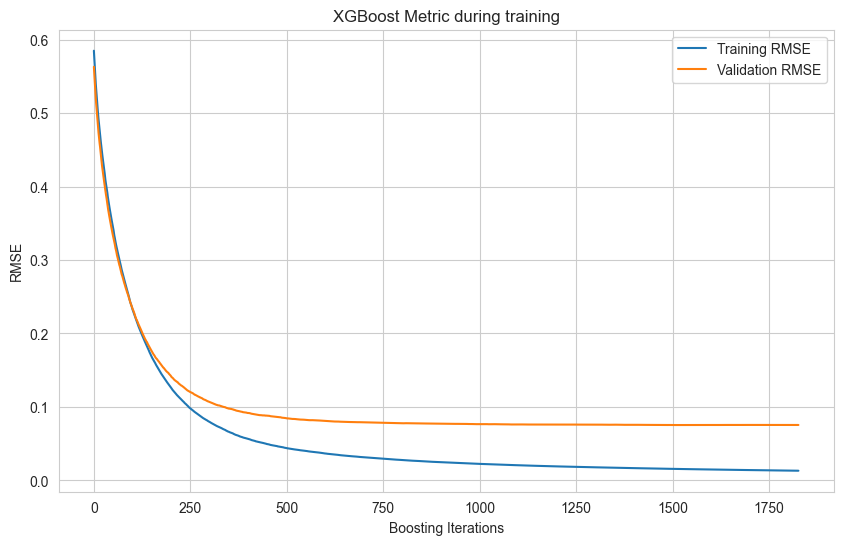


Making predictions on the Test set...

--- XGBoost Final Results ---
Test Set RMSE: $81,662.25
-----------------------------
LightGBM RMSE: $80,974.19
XGBoost RMSE:  $81,662.25


In [68]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

numerical_features.remove('store')
categorical_features.append('store')

print(f"\nIdentified {len(numerical_features)} numerical features for XGBoost.")
print(f"Identified {len(categorical_features)} categorical features for XGBoost: {categorical_features}")

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of X_train after processing: {X_train_processed.shape}")
print(f"Shape of X_val after processing: {X_val_processed.shape}")

# ---  Train the XGBoost Model ---


print("\nTraining XGBoost model...")
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    eval_metric='rmse',
    n_estimators=10000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    seed=42,
    n_jobs=-1,
    early_stopping_rounds= 300,
)

xgb_model.fit(
    X_train_processed, y_train_log,
    eval_set=[(X_train_processed, y_train_log), (X_val_processed, y_val_log)],
    verbose=False 

print("Model training complete.")

print("\n--- Best Model Details ---")

best_iteration = xgb_model.best_iteration
print(f"Best Iteration: {best_iteration}")

best_val_rmse = xgb_model.best_score
print(f"Best Validation RMSE: {best_val_rmse:.4f}")

results = xgb_model.evals_result()
best_train_rmse = results['validation_0']['rmse'][best_iteration]
print(f"Training RMSE at Best Iteration: {best_train_rmse:.4f}")
print("--------------------------")


# ---  Visualize Training and Validation Loss ---
print("\nPlotting training history...")
results = xgb_model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
epochs = len(train_rmse)

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_rmse, label='Training RMSE')
plt.plot(range(epochs), val_rmse, label='Validation RMSE')
plt.title('XGBoost Metric during training')
plt.xlabel('Boosting Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# ---  Evaluate on the Hold-Out Test Set ---
print("\nMaking predictions on the Test set...")
test_pred_log = xgb_model.predict(X_test_processed)

test_pred = np.expm1(test_pred_log)

final_rmse_xgb = np.sqrt(mean_squared_error(y_test, test_pred))

print("\n--- XGBoost Final Results ---")
print(f"Test Set RMSE: ${final_rmse_xgb:,.2f}")
print("-----------------------------")

# Compare with LightGBM
print(f"LightGBM RMSE: ${final_rmse:,.2f}")
print(f"XGBoost RMSE:  ${final_rmse_xgb:,.2f}")


Plotting actual vs. predicted values for the test set...


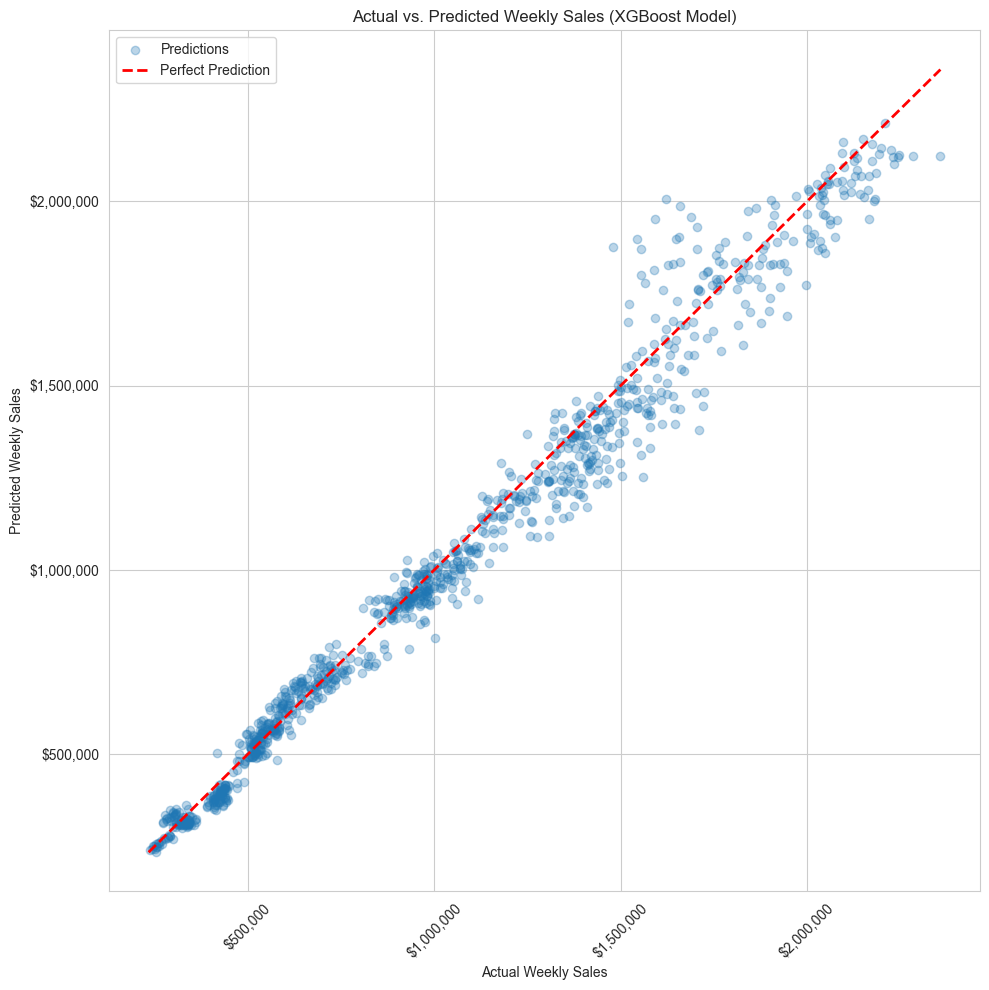


Plotting actual vs. predicted values for the test set...


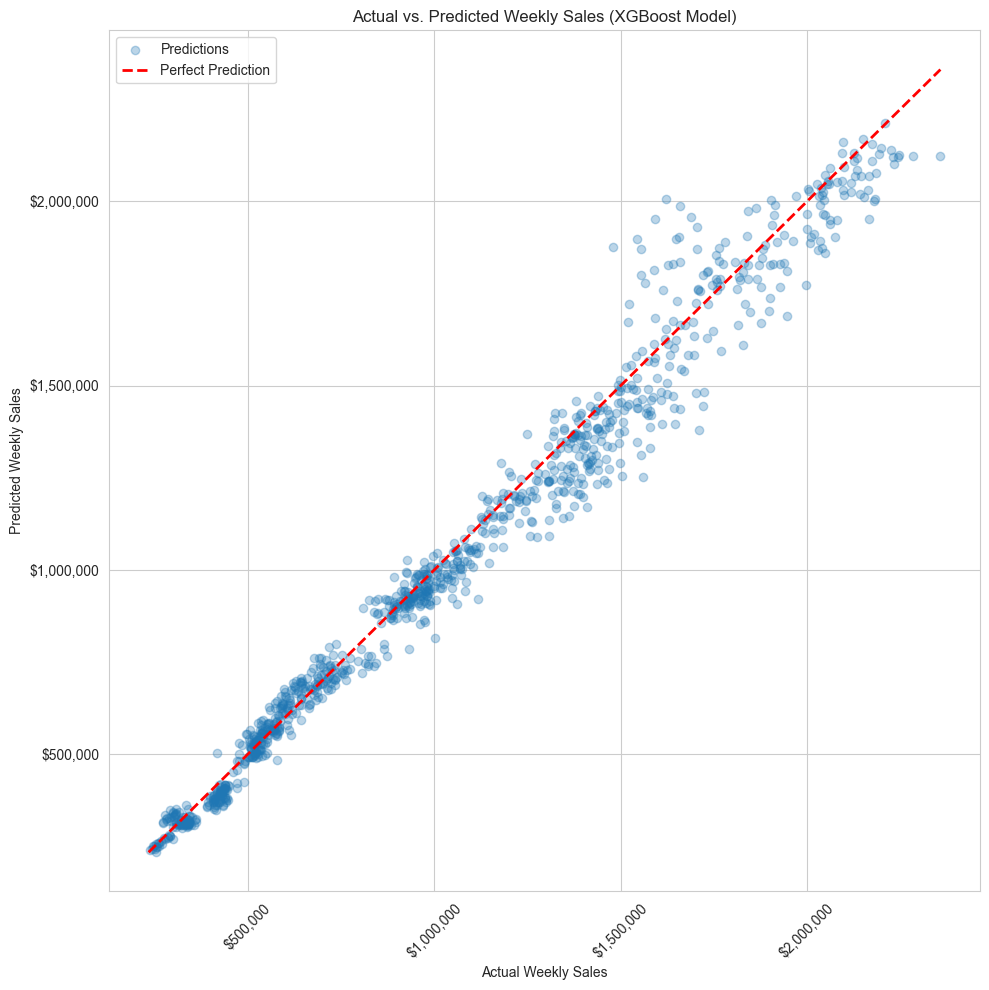

In [70]:
# --- Visualize Predictions vs. Actuals on the Test Set ---
from matplotlib.ticker import FuncFormatter

print("\nPlotting actual vs. predicted values for the test set...")

def currency_formatter(x, pos):
    """The two args are the value and tick position"""
    return f'${x:,.0f}'

formatter = FuncFormatter(currency_formatter)

plt.figure(figsize=(10, 10))

plt.scatter(y_test, test_pred, alpha=0.3, label='Predictions')


lim_min = min(y_test.min(), test_pred.min())
lim_max = max(y_test.max(), test_pred.max())
plt.plot([lim_min, lim_max], [lim_min, lim_max], 'r--', linewidth=2, label='Perfect Prediction')

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (XGBoost Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\nPlotting actual vs. predicted values for the test set...")

def currency_formatter(x, pos):
    """The two args are the value and tick position"""
    return f'${x:,.0f}'

formatter = FuncFormatter(currency_formatter)

plt.figure(figsize=(10, 10))

plt.scatter(y_test, test_pred, alpha=0.3, label='Predictions')


lim_min = min(y_test.min(), test_pred.min())
lim_max = max(y_test.max(), test_pred.max())
plt.plot([lim_min, lim_max], [lim_min, lim_max], 'r--', linewidth=2, label='Perfect Prediction')

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (XGBoost Model)")
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

### Model Results

The results were good:

**LightGBM & XGBoost:** 

* Both models significantly outperformed the linear baselines. The initial untuned LightGBM achieved an **RMSE of ~$80.9k$**, slightly better than XGBoost **RMSE of ~$81.6k$**.


 ## Hyperparameter Tuning:
 To maximize performance, we performed a **Grid Search** on the LightGBM model's key hyperparameters (`learning_rate`, `num_leaves`, `reg_alpha`, `reg_lambda`). This systematic search found a better combination of parameters, further improving our model's performance on the validation set and resulting in a final **Test Set RMSE of $79,824.43**.

# LightGBM : Grid Search


--- Starting Grid Search ---
Testing 81 parameter combinations...

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
-> Validation RMSE: 0.0753 at iteration 4808
!!! New best score found: 0.0753 !!!

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.5, 'reg_lambda': 0.2}
-> Validation RMSE: 0.0746 at iteration 4864
!!! New best score found: 0.0746 !!!

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.5, 'reg_lambda': 0.3}
-> Validation RMSE: 0.0739 at iteration 6981
!!! New best score found: 0.0739 !!!

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.7, 'reg_lambda': 0.1}
-> Validation RMSE: 0.0755 at iteration 4153

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.7, 'reg_lambda': 0.2}
-> Validation RMSE: 0.0741 at iteration 6979

Testing parameters: {'learning_rate': 0.01, 'num_leaves': 20, 'reg_alpha': 0.7, 'reg_lambda': 0.

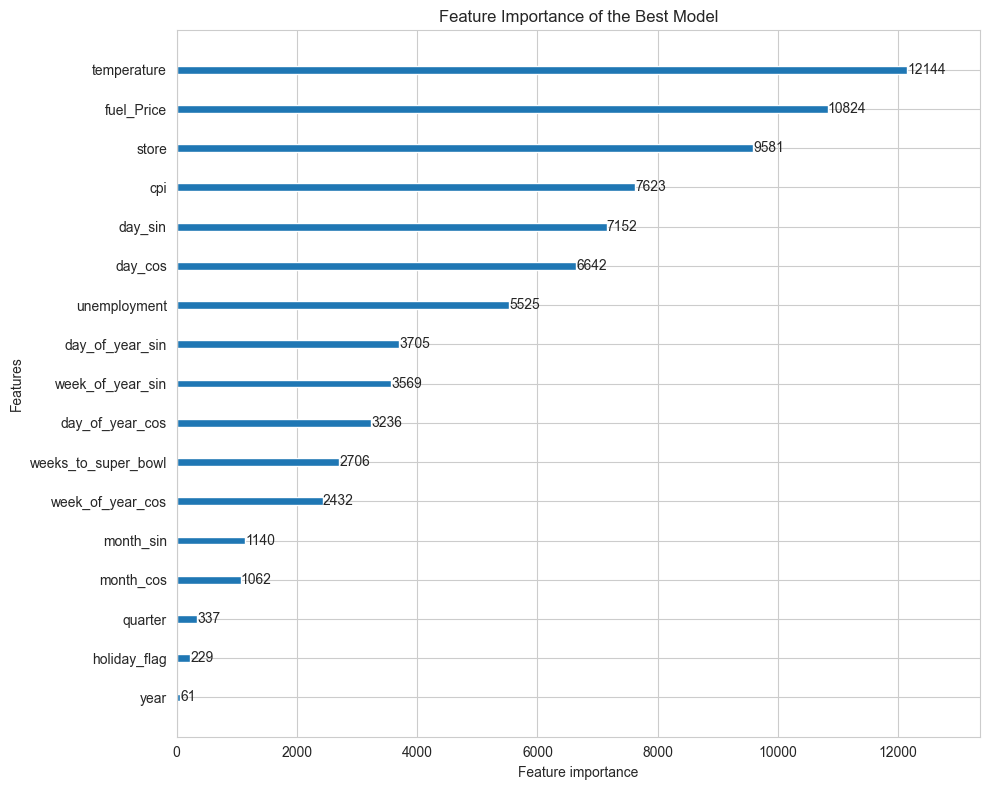

In [75]:
from sklearn.model_selection import ParameterGrid

# --- Step 3: Define the Hyperparameter Grid for Grid Search ---
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'num_leaves': [20, 31, 52],
    'reg_alpha': [0.5, 0.7, 0.9],  # L1 regularization
    'reg_lambda': [0.1, 0.2, 0.3]  # L2 regularization
}

# Initialize variables to store the best model and its performance
best_rmse = float('inf')
best_params = {}
best_model = None

print(f"\n--- Starting Grid Search ---")
print(f"Testing {len(ParameterGrid(param_grid))} parameter combinations...")

# --- Step 4: Perform the Grid Search ---
for params in ParameterGrid(param_grid):
    print(f"\nTesting parameters: {params}")

    # Create the LightGBM model with the current set of parameters
    lgbm = lgb.LGBMRegressor(
        objective='regression_l1',
        metric='rmse',
        n_estimators=10000,   # High number, will be stopped by early stopping
        seed=42,
        n_jobs=-1,
        verbose=-1,
        max_depth = -1,
        **params # Unpack the current grid parameters
    )

    # Train the model with early stopping
    lgbm.fit(
        X_train, y_train_log,
        eval_set=[(X_val, y_val_log)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(100, verbose=False)], # verbose=False to keep output clean
        categorical_feature=categorical_features
    )

    # Get the best score (RMSE on validation set) from the trained model
    # The score is stored in the best_score_ attribute after training
    current_rmse = lgbm.best_score_['valid_0']['rmse']
    print(f"-> Validation RMSE: {current_rmse:.4f} at iteration {lgbm.best_iteration_}")

    # If the current model is better than the best one found so far, update
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_params = params
        best_model = lgbm # Save the entire model object
        print(f"!!! New best score found: {best_rmse:.4f} !!!")

print("\n--- Grid Search Complete ---")
print(f"Best Validation RMSE: {best_rmse:.4f}")
print(f"Best Parameters Found: {best_params}")


# --- Step 5: Evaluate the Best Model on the Hold-Out Test Set ---
print("\nMaking predictions on the Test set with the best model...")

# Use the best model found during the grid search to predict
test_pred_log = best_model.predict(X_test, num_iteration=best_model.best_iteration_)

# Inverse transform the predictions
test_pred = np.expm1(test_pred_log)

# Calculate final RMSE on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("\n--- Best LightGBM Final Results ---")
print(f"Test Set RMSE: ${final_rmse:,.2f}")
print("-----------------------------------")

# Let's also look at the first 5 predictions vs actuals on the test set
test_results_df = pd.DataFrame({'Actual Sales': y_test.values, 'Predicted Sales': test_pred})
print("\nSample of predictions vs actuals on Test Set:")
print(test_results_df.head().to_string(formatters={'Actual Sales': '${:,.2f}'.format, 'Predicted Sales': '${:,.2f}'.format}))

# --- Step 6: (Optional) Visualize Feature Importance of the Best Model ---
print("\nPlotting feature importances of the best model...")
lgb.plot_importance(best_model, figsize=(10, 8), max_num_features=20)
plt.title('Feature Importance of the Best Model')
plt.tight_layout()
plt.show()

### Final Model Choice

The **tuned LightGBM model** was selected as our final model. It provided the best performance on our hold-out test set, demonstrating its ability to accurately capture the complex patterns in the sales data. The feature importance plot confirms that our engineered features, especially `week_of_year`, are highly influential, validating our feature engineering strategy.